In [ ]:
!pip install minepy



In [ ]:
#importing packages
import pandas as pd #processing the data
import numpy as np #linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import time as tm
import math
from minepy import MINE
from sklearn.feature_selection import SelectKBest

# Distribution of the features

(array([[19.,  1.,  0., ...,  0.,  0.,  0.],
        [19.,  0.,  1., ...,  0.,  0.,  0.],
        [18.,  2.,  0., ...,  0.,  0.,  0.],
        ...,
        [19.,  1.,  0., ...,  0.,  0.,  0.],
        [19.,  1.,  0., ...,  0.,  0.,  0.],
        [19.,  1.,  0., ...,  0.,  0.,  0.]]),
 array([  0. ,  64.8, 129.6, 194.4, 259.2, 324. , 388.8, 453.6, 518.4,
        583.2, 648. ]),
 <a list of 142 Lists of Patches objects>)

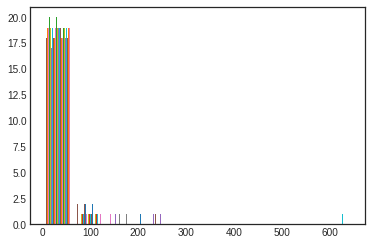

In [ ]:
#reading csv files as dataframes
hepa = pd.read_csv('hepatitis.csv')
plt.style.use('seaborn-white')
plt.hist(hepa)

In [ ]:
hepa.head() #show the first five rows of the dataset

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,ClassLabel
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1,1
3,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1,1


Text(0.5, 1.0, 'The histogram of feature age')

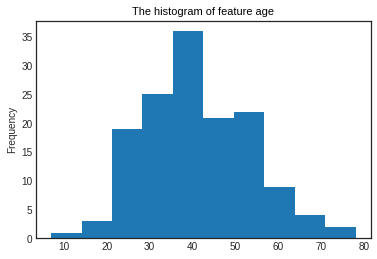

In [ ]:
hepa['age'].plot.hist()
plt.title('The histogram of feature age',color = 'black', fontsize = 11)

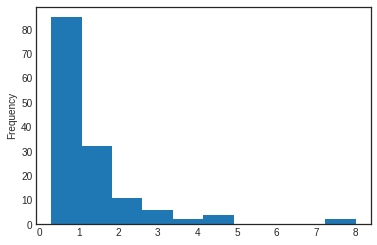

In [ ]:
hepa['bilirubin'].plot.hist()

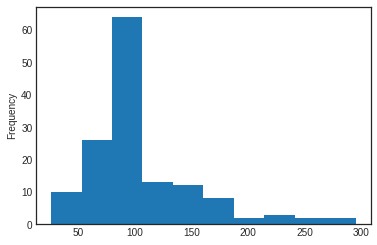

In [ ]:
hepa['alk_phosphate'].plot.hist()

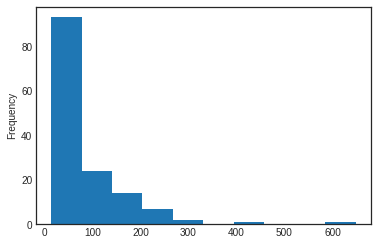

In [ ]:
hepa['sgot'].plot.hist()

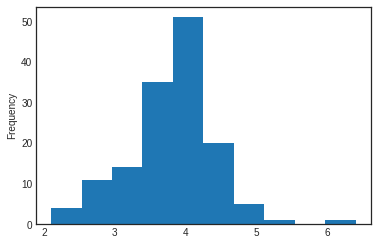

In [ ]:
hepa['albumin'].plot.hist()

Text(0.5, 1.0, 'The histogram of feature protime')

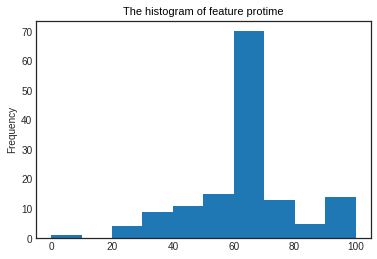

In [ ]:
hepa['protime'].plot.hist()
plt.title('The histogram of feature protime',color = 'black', fontsize = 11)

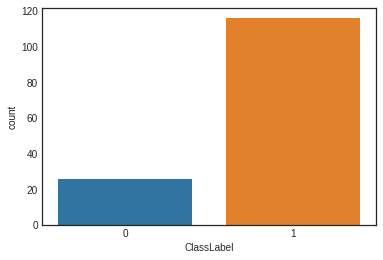

In [ ]:
sns.countplot(x='ClassLabel',data=hepa)

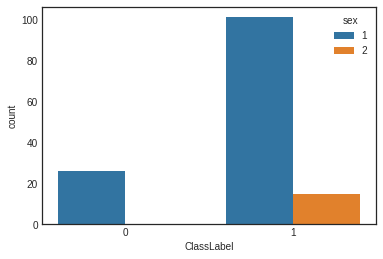

In [ ]:
sns.countplot(x='ClassLabel',hue='sex',data=hepa)

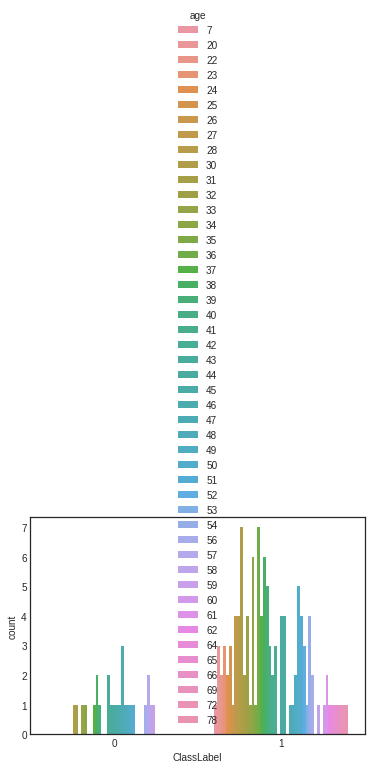

In [ ]:
sns.countplot(x='ClassLabel',hue='age',data=hepa)

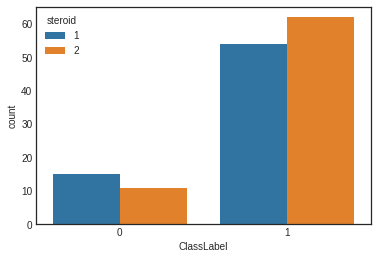

In [ ]:
sns.countplot(x='ClassLabel',hue='steroid',data=hepa)

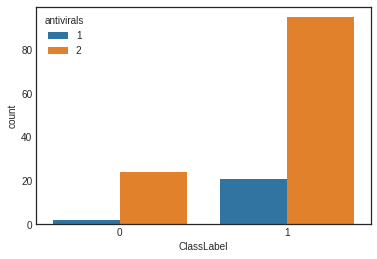

In [ ]:
sns.countplot(x='ClassLabel',hue='antivirals',data=hepa)

Text(0.5, 1.0, 'Having fatigue or not')

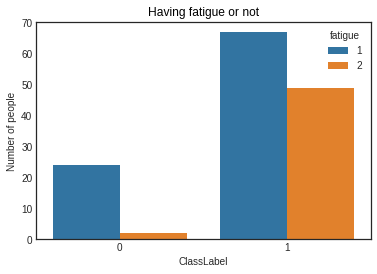

In [ ]:
sns.countplot(x='ClassLabel',hue='fatigue',data=hepa)
plt.xlabel('ClassLabel')
plt.ylabel('Number of people')
plt.title('Having fatigue or not',color = 'black', fontsize = 12)

Text(0.5, 1.0, 'Having malaise or not')

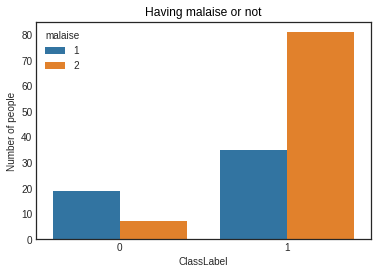

In [ ]:
sns.countplot(x='ClassLabel',hue='malaise',data=hepa)
plt.xlabel('ClassLabel')
plt.ylabel('Number of people')
plt.title('Having malaise or not',color = 'black', fontsize = 12)

##Logistic Regression (Stopping criteria and learning rate), K-fold cross validation

In [ ]:
#reading csv files as dataframes
hepa = pd.read_csv('hepatitis.csv')
#segregate features and class labels
X = hepa.iloc[:,0:-1]
Y = pd.DataFrame(hepa['ClassLabel'])

##plotting correlation map
#pd.set_option('display.max_columns', None)
#corr = X.corr()
#print(corr)
#print(type(corr))
#sm.graphics.plot_corr(corr, xnames=list(corr.columns))
#plt.show()

#converting pandas dataframe to numpy array
X = X.to_numpy()
Y = Y.to_numpy()
m = X.shape[0] # # of observations
#adding dummy feature '1'
X = np.concatenate((np.ones((m,1)),X),axis=1)
n = X.shape[1] # # of features
#print(X)

In [ ]:
#Normalizing features, leaving dummy features unnormalized
for i in range(n-1):
  column = X[:,i+1]
  if max(column) - min(column) == 1: #leave categorial features unnormalized
    pass
  else:
    X[:,i+1] = (X[:,i+1] - min(column))/(max(column) - min(column)) #(X-X_min)/(X_max-X_min)

#print(X)

Text(0.5, 1.0, 'loss vs. iteration')

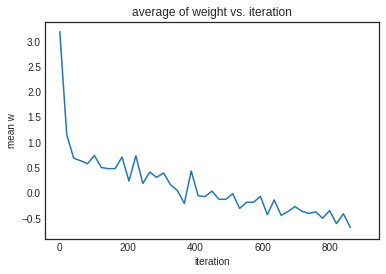

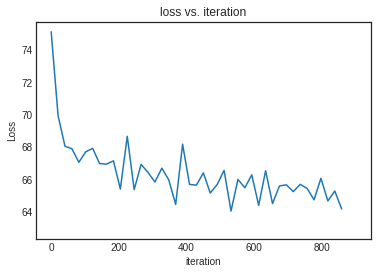

In [ ]:
class hep_model():
  def __init__(self, X, Y):
    #defining variables
    self.X=X
    self.Y=Y
    self.n = X.shape[1]
    self.m = Y.shape[0]
    self.L = []
    self.w_mean = []
    self.stop_cri = 0
    #self.w = np.zeros((self.n,1))
    self.w = np.random.randn(self.n,1) * 0.01

  def sig(self, z):
    #defining sigmoid function, taking array as input
    s = 1 / (1 + np.exp(-z))
    return s
    
  def fit(self, a, max_iter, e_w1, e_w2, e_L, stop):
    #this module fits the training data according to logistic regression
    #a is learning rate, max_iter defines the maximum # ofiteration of gradient descent
    #e_w1, e_w2 and e_mean defines the threshold of mean weight, maximum weight or loss function that gradient descent is supposed to stop once the threshold is reached
    #stop indicated the stopping criterion: mean of weight fluctuation, max of weight fluctuation, change of loss function compared to the last 10
    L = 1000
    t1 = tm.time()
    for i in range(max_iter):
      #taking sigmoid of w'X
      A = self.sig(np.dot(self.X,self.w))
      L_old = L
      
      #loss function
      L = -np.sum(self.Y*np.log(self.sig(A))+(1-self.Y)*np.log(1-self.sig(A)))
      self.L.append(L)
      #self.w_mean.append(np.mean(self.w))
      w_old = self.w

      #gradient descent
      self.w = self.w + a*np.dot(np.transpose(self.X),self.Y-A)
      self.w_mean.append(np.mean(self.w))

      #defining different stopping criteria
      if stop=='w_mean' and abs(np.mean(self.w)-np.mean(w_old))<=e_w1:
        self.stop_cri=1
        break
      elif stop=='w_max' and np.max(abs(self.w-w_old))<=e_w2:
        self.stop_cri=2
        break
      elif stop=='L_hist' and abs(L-np.mean(self.L[-22:-2]))<=e_L:
        
        self.stop_cri=3
        break
    t2 = tm.time()
    dt = t2-t1
    end_iter = i
    return self.w_mean, self.w, self.L, L, dt, end_iter, self.stop_cri

  def predict(self, w, X):
    #this module predicts the outcome (1/0) according to the input observation
    #first take the sigmoid of w'T
    result = self.sig(np.dot(X,w))
    #taking 0.5 as threshold
    if result >0.5:
      prediction = 1
    else:
      prediction = 0
    #print(result)
    return prediction


lg = hep_model(X,Y)
pred = []
w_mean, w, L_hist, L, dt, iter, stop_cri = lg.fit(0.06,5000,0.03,0.06,1,'w_mean')
#print(stop_cri, L, dt, iter)


avg = 20
w_mean1 = [None]*(math.floor(len(w_mean)/avg)+1)
for i in range(math.floor(len(w_mean)/avg)):
  w_ = np.mean(w_mean[avg*i:avg*(i+1)])
  w_mean1[i]=w_
if len(w_mean)%avg is not 0:
  w_mean1.append(np.mean(w_mean[-(len(w_mean)%avg):-1]))


L_hist1 = [None]*(math.floor(len(w_mean)/avg)+1)
for i in range(math.floor(len(L_hist)/avg)):
  h_ = np.mean(L_hist[avg*i:avg*(i+1)])
  L_hist1[i]=h_
if len(L_hist)%avg is not 0:
  L_hist1.append(np.mean(L_hist[-(len(L_hist)%avg):-1]))

plt.plot(np.linspace(0,avg*len(w_mean1),len(w_mean1)),w_mean1)
plt.xlabel('iteration')
plt.ylabel('mean w')
plt.title('average of weight vs. iteration')
plt.figure()
plt.plot(np.linspace(0,avg*len(L_hist1),len(L_hist1)),L_hist1)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('loss vs. iteration')

In [ ]:
#iter = np.linspace(0,4000,1)


In [ ]:
def Accu_eval(X,Y,lg,w):
  #defining evaluation metrics
  pred = []
  true_positive = 0
  true_negative = 0
  false_positive = 0
  false_negative = 0

  for i in range(X.shape[0]):
    #going through input examples one by one to predict the class
    p = lg.predict(w,X[i,:])
    #print(X[i,:])
    pred.append(p)

  Y = np.transpose(Y)
  Y_list = Y[0]
  #print(Y_list[0])
  pred = np.array(pred)
  accuracy = 100-np.mean(np.abs(Y_list-pred))*100 #accuracy in %
  #print(Y_list)
  #print(pred)

  for i in range(len(pred)-1):
    if Y_list[i]==1 and pred[i]==1:
      true_positive+=1
    elif Y_list[i]==0 and pred[i]==0:
      true_negative+=1
    elif Y_list[i]==1 and pred[i]==0:
      false_negative+=1
    elif Y_list[i]==0 and pred[i]==1:
      false_positive+=1

  precision = true_positive/(true_positive+false_positive)
  recall = true_positive/(true_positive+true_negative)
  F1 = 2*precision*recall/(precision+recall)

  return accuracy, precision, recall, F1
lg = hep_model(X,Y)
w_mean, w, L_hist, L, dt, iter, stop_cri = lg.fit(0.03,5000,0.03,1,0.03,'w_mean')
accuracy, precision, recall, F1 = Accu_eval(X,Y,lg,w)
print("The accuracy is ",accuracy, "%")
print("The precision is ",precision)
print("The recall is ",recall)
print("The F1 score is ",F1)

The accuracy is  87.32394366197184 %
The precision is  0.9224137931034483
The recall is  0.8699186991869918
The F1 score is  0.8953974895397491


In [ ]:
# this section compares the three stopping criteria: mean weight, maximum weight and loss function
cache = np.zeros((15,5))
for i in range(5):
  # Run fit module 5 times with mean weight as the threshold
  lg = hep_model(X,Y)
  w_mean, w, L_hist, L, dt, iter, stop_cri = lg.fit(0.03,5000,0.03,0.1,0.1,'w_mean')
  accuracy, precision, recall, F1 = Accu_eval(X,Y,lg,w)
  cache[i,:]=[stop_cri,iter,dt,accuracy, F1]

for i in range(5):
  # Run fit module 5 times with max weight as the threshold
  lg = hep_model(X,Y)
  w_mean, w, L_hist, L, dt, iter, stop_cri = lg.fit(0.03,5000,0.03,0.1,0.1,'w_max')
  accuracy, precision, recall, F1 = Accu_eval(X,Y,lg,w)
  cache[i+5,:]=[stop_cri,iter,dt,accuracy, F1]

for i in range(5):
  # Run fit module 5 times with loss function as the threshold
  lg = hep_model(X,Y)
  w_mean, w, L_hist, L, dt, iter, stop_cri = lg.fit(0.03,5000,0.03,0.1,0.01,'L_hist')
  accuracy, precision, recall, F1 = Accu_eval(X,Y,lg,w)
  cache[i+10,:]=[stop_cri,iter,dt,accuracy, F1]
#print(cache)

stop_cris = pd.DataFrame(cache, columns=["stopping criteria", 'iteration', "run time(t)", 'accuracy(%)', 'F1 score'])
print(stop_cris)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


    stopping criteria  iteration  run time(t)  accuracy(%)  F1 score
0                 1.0      450.0     0.048485    88.028169  0.895397
1                 1.0      330.0     0.042108    88.028169  0.896266
2                 1.0      108.0     0.011702    88.732394  0.896266
3                 1.0      120.0     0.011445    88.732394  0.896266
4                 1.0      208.0     0.019252    89.436620  0.897119
5                 2.0      739.0     0.068280    89.436620  0.897119
6                 2.0      721.0     0.062622    88.732394  0.897119
7                 2.0     1731.0     0.152558    90.140845  0.897119
8                 2.0     1804.0     0.166341    90.140845  0.897119
9                 2.0     1035.0     0.088650    90.140845  0.897119
10                3.0     1008.0     0.114619    80.985915  0.878049
11                3.0     1506.0     0.169059    83.098592  0.881517
12                3.0     1835.0     0.252327    83.802817  0.902724
13                3.0      653.0  

In [ ]:
#stop_cris.to_excel('/content/gdrive/My Drive/Colab Notebooks/stop_criteria.xlsx',sheet_name='Sheet1', index = False)
#stop_cris.to_excel('/content/stop_criteria.xlsx',sheet_name='Sheet1', index = False)

In [ ]:
# this section investigates the impact of learning rate
cache_ = np.zeros((15,5))
for i in range(15):
  lg = hep_model(X,Y)
  w_mean, w, L_hist, L, dt, iter, stop_cri = lg.fit(0.01*(3*i+3),5000,0.03,0.06,1,'w_mean')
  accuracy, precision, recall, F1 = Accu_eval(X,Y,lg,w)
  cache_[i,:]=[0.01*(3*i+3),iter,dt,accuracy, F1]

learning_rates = pd.DataFrame(cache_, columns=["learning rate","iteration", "run time(t)", 'accuracy(%)', 'F1 score'])
print(learning_rates)

    learning rate  iteration  run time(t)  accuracy(%)  F1 score
0            0.03      143.0     0.023746    88.732394  0.896266
1            0.06       24.0     0.004543    86.619718  0.894515
2            0.09      147.0     0.024466    88.732394  0.896266
3            0.12      135.0     0.022324    88.732394  0.896266
4            0.15      143.0     0.023595    88.732394  0.896266
5            0.18      245.0     0.043449    88.732394  0.896266
6            0.21      125.0     0.020187    88.732394  0.896266
7            0.24      142.0     0.020945    88.732394  0.896266
8            0.27      848.0     0.090058    90.140845  0.897119
9            0.30      116.0     0.012626    88.732394  0.896266
10           0.33       92.0     0.009043    88.732394  0.896266
11           0.36      123.0     0.011436    88.732394  0.896266
12           0.39      225.0     0.023406    88.732394  0.896266
13           0.42       85.0     0.007901    88.732394  0.896266
14           0.45      12

In [ ]:
#learning_rates.to_excel('/content/gdrive/My Drive/Colab Notebooks/learning_rates.xlsx',sheet_name='Sheet1', index = False)
learning_rates.to_excel('/content/learning_rates.xlsx',sheet_name='Sheet1', index = False)

In [ ]:
class corss_validation():
    def __init__(self,olddata,k_fold,model,Accu_eval_):
        self.olddata=olddata
        self.k_fold=k_fold
        self.model=model
        self.traindata=olddata
        self.validata=olddata
        self.Accu_eval_=Accu_eval_
        self.acc=[]
        self.acc_train=[]

    def cut_data(self,no_cut):#no_cut means No. cut. Here generate traindata and validata
        self.traindata=self.olddata
        num_cut=int(self.olddata.shape[0]/self.k_fold)
        for i in range(num_cut):
            self.traindata=self.traindata.drop([num_cut*no_cut])
            self.traindata.index=range(len(self.traindata))
        self.validata=self.olddata.iloc[num_cut*no_cut:num_cut*(no_cut+1)]
        self.validata.index=range(len(self.validata))

    def train_validate(self):
        for i in range (self.k_fold):
            self.cut_data(i)
            X = self.traindata.iloc[:,0:-1]
            Y = pd.DataFrame(self.traindata['ClassLabel'])
            X = X.to_numpy()
            Y = Y.to_numpy()
            lg = self.model(X,Y)
            w_mean, w, L_hist, L, dt, iter, stop_cri = lg.fit(0.03,5000,0.03,0.06,1,'w_mean')
            accuracy= self.Accu_eval_(X,Y,lg,w)
            self.acc_train.append(accuracy)
        #print(np.mean(self.acc))
        mean_acc_train=np.mean(self.acc_train)
        return mean_acc_train
       

    def validate(self):
        for i in range (self.k_fold):
            self.cut_data(i)
            X = self.traindata.iloc[:,0:-1]
            Y = pd.DataFrame(self.traindata['ClassLabel'])
            X = X.to_numpy()
            Y = Y.to_numpy()
            lg = self.model(X,Y)
            w_mean, w, L_hist, L, dt, iter, stop_cri = lg.fit(0.03,5000,0.03,0.06,1,'w_mean')
            X = self.validata.iloc[:,0:-1]
            Y = pd.DataFrame(self.validata['ClassLabel'])
            X = X.to_numpy()
            Y = Y.to_numpy()
            accuracy= self.Accu_eval_(X,Y,lg,w)
            self.acc.append(accuracy)
        #print(np.mean(self.acc))
        mean_acc=np.mean(self.acc)
        return mean_acc


In [ ]:
def varselect(olddata,tol_var):
    remain_columns=[]
    var=olddata.var()
    for i in range (0,olddata.shape[1]-1):
        if var.array[i]<tol_var:
            remain_columns.append(olddata.columns[i])
    newdata=olddata.drop(columns=remain_columns)
    return newdata
    


In [ ]:
def mic(x, y):
    m = MINE()
    m.compute_score(x, y)
    return (m.mic(), 0.5)

def MICselection(olddata,k):
  XX = olddata.iloc[:,0:-1]
  YY = pd.DataFrame(olddata['ClassLabel'])
  XX = XX.to_numpy()
  YY = YY.to_numpy()
  YY=np.array(YY).T
  YY=YY[0]
  data_new =  SelectKBest(lambda X, Y: tuple(map(tuple,np.array(list(map(lambda x:mic(x, Y), X.T))).T)), k).fit_transform(XX,YY)
  data_new = pd.DataFrame(data_new)
  columsname=[]
  for i in range(data_new.shape[1]):
    columsname.append("feature"+' '+str(i))
  data_new.columns=columsname
  data_new=pd.concat( [data_new,pd.DataFrame(olddata['ClassLabel'])], axis=1 ,ignore_index=True)
  data_new.columns = [*data_new.columns[:-1], 'ClassLabel']
  return data_new

SelectKBest(k=4, score_func=<function f_classif at 0x7f5066c1c510>)
[1.24345937 1.2754327  0.51188864 0.70902274 3.10225288 4.5033066
 1.32403793 0.42901453 0.47259886 1.60410135 6.1558574  9.56339013
 5.68835223 8.12902409 1.12295083 0.11711841 7.86349589 3.51604403
 3.765382  ]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<BarContainer object of 19 artists>

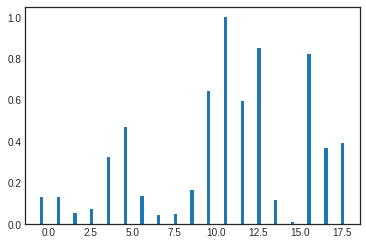

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
olddata = pd.read_csv('hepatitis.csv',header=0) 
X = olddata.iloc[:,0:-1]
y= pd.DataFrame(olddata['ClassLabel'])
selector = SelectKBest(f_classif, k=4)
print(selector)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
print(scores)
X_indices = np.arange(X.shape[-1])
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')

In [ ]:
def Accu_eval_(X,Y,lg,w):
  #defining evaluation metrics
  pred = []


  for i in range(X.shape[0]):
    #going through input examples one by one to predict the class
    p = lg.predict(w,X[i,:])
    #print(X[i,:])
    pred.append(p)

  Y = np.transpose(Y)
  Y_list = Y[0]
  #print(Y_list[0])
  pred = np.array(pred)
  accuracy = 100-np.mean(np.abs(Y_list-pred))*100 #accuracy in %
  #print(Y_list)
  #print(pred)


  return accuracy

In [ ]:
def add_feature(olddata,order):
  if order==1:
    return olddata
  else:
      Y = pd.DataFrame(olddata['ClassLabel'])
      fea_data=olddata.drop(columns=olddata.columns[olddata.shape[1]-1])
      newdata=fea_data
      for i in range(2,order+1):
        columsname=[]
        for ii in range(olddata.shape[1]-1):
          columsname.append(str(olddata.columns[ii])+' '+str(i))
        newdata0=fea_data**(i*1)
        newdata0.columns=columsname
        newdata=newdata.join(newdata0)
      newdata=newdata.join(Y)
      return newdata
      

[84.6875, 84.84375, 84.84375, 84.921875, 85.078125, 84.765625, 84.84375, 84.84375, 84.53125, 84.84375]
[85.0, 83.57142857142858, 85.0, 84.2857142857143, 82.85714285714286, 82.85714285714286, 83.57142857142857, 85.0, 86.42857142857144, 84.28571428571429]


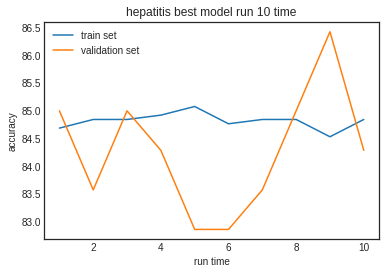

In [ ]:
#in this box is the best model we found, and run 10 times to check its stability
mean_acc_list=[]
mean_acc_train_list=[]
x=[]
for i in range(1,11):
  x.append(i)
  olddata = pd.read_csv('hepatitis.csv',header=0) 
  olddata=olddata.sample(frac=1.0)#shuffle all the data
  olddata.index=range(len(olddata))
  olddata=MICselection(olddata,2)
  cos=corss_validation(olddata,10,hep_model,Accu_eval_)
  mean_acc=cos.validate()
  mean_acc_list.append(mean_acc)
  mean_acc_train=cos.train_validate()
  mean_acc_train_list.append(mean_acc_train)
plt.plot(x,mean_acc_train_list)
plt.plot(x,mean_acc_list)
plt.title('hepatitis best model run 10 time')
plt.legend(["train set","validation set"])
plt.xlabel('run time')
plt.ylabel('accuracy')
print(mean_acc_train_list)
print(mean_acc_list)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


[75.46875, 84.6875, 83.28125, 75.390625, 75.859375, 79.296875, 77.03125, 70.703125, 78.125]
[80.0, 85.0, 81.42857142857142, 76.42857142857142, 82.14285714285714, 80.0, 75.0, 78.57142857142858, 75.71428571428572]


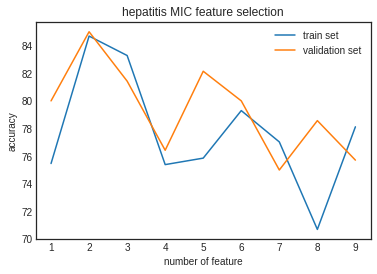

In [ ]:
#in following 3 code box, is the process of find the best model 
#this part is to compare model with different the subsets of features, which was select by feature selection based on the Maximal Information Coefficient (MIC).
mean_acc_list=[]
mean_acc_train_list=[]
x=[]
for i in range(1,10):
    x.append(i)
    olddata = pd.read_csv('hepatitis.csv',header=0) 
    olddata=olddata.sample(frac=1.0)#shuffle all the data
    olddata.index=range(len(olddata))
    olddata=MICselection(olddata,i)
    cos=corss_validation(olddata,10,hep_model,Accu_eval_)
    mean_acc=cos.validate()
    mean_acc_list.append(mean_acc)
    mean_acc_train=cos.train_validate()
    mean_acc_train_list.append(mean_acc_train)
plt.plot(x,mean_acc_train_list)
plt.plot(x,mean_acc_list)
plt.title('hepatitis MIC feature selection')
plt.legend(["train set","validation set"])
plt.xlabel('number of feature')
plt.ylabel('accuracy')
print(mean_acc_train_list)
print(mean_acc_list)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


[79.53125, 81.25, 80.3125, 79.765625, 79.84375, 80.078125, 79.140625, 81.328125, 82.65625, 80.78125, 81.328125, 82.34375, 78.203125, 81.328125, 82.265625, 80.234375, 80.15625, 77.890625, 79.375]
[73.57142857142858, 78.57142857142858, 77.14285714285715, 79.28571428571429, 78.57142857142857, 82.14285714285715, 77.14285714285715, 80.71428571428572, 78.57142857142858, 74.28571428571428, 73.57142857142858, 80.00000000000001, 80.71428571428572, 78.57142857142858, 75.71428571428574, 78.57142857142858, 80.71428571428574, 83.57142857142858, 74.28571428571429]


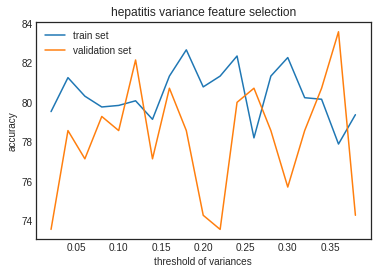

In [ ]:
#this part is to compare model with different the subsets of features, which was select by removing features with low variance.
mean_acc_list=[]
mean_acc_train_list=[]
x=[]
for i in range(1,20):
    tol_var=0+i*0.02
    x.append(tol_var)
    olddata = pd.read_csv('hepatitis.csv',header=0) 
    olddata=olddata.sample(frac=1.0)#shuffle all the data
    olddata.index=range(len(olddata))
    olddata=varselect(olddata,tol_var)
    cos=corss_validation(olddata,10,hep_model,Accu_eval_)
    mean_acc=cos.validate()
    mean_acc_list.append(mean_acc)
    mean_acc_train=cos.train_validate()
    mean_acc_train_list.append(mean_acc_train)

plt.plot(x,mean_acc_train_list)
plt.plot(x,mean_acc_list)
plt.title('hepatitis variance feature selection')
plt.legend(["train set","validation set"])
plt.xlabel('threshold of variances')
plt.ylabel('accuracy')
print(mean_acc_train_list)
print(mean_acc_list)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ip

[83.4375, 74.6875, 81.71875, 75.390625, 68.4375, 81.328125, 75.078125, 81.640625, 81.640625]
[80.0, 76.42857142857142, 80.71428571428572, 72.85714285714286, 72.85714285714286, 81.42857142857142, 75.71428571428572, 81.42857142857142, 81.42857142857142]


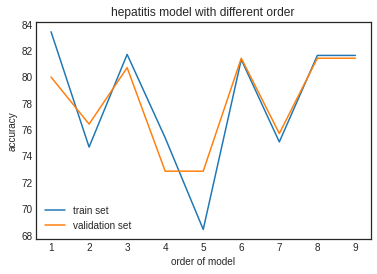

In [ ]:
#this part is to compare model with different order, which was get by using Polynomial Curve Fitting method after feature selection
mean_acc_list=[]
mean_acc_train_list=[]
x=[]
for i in range(1,10):
    x.append(i)
    olddata = pd.read_csv('hepatitis.csv',header=0)
    olddata=olddata.sample(frac=1.0)#shuffle all the data
    olddata.index=range(len(olddata))
    olddata=MICselection(olddata,3)
    olddata=add_feature(olddata,i)
    cos=corss_validation(olddata,10,hep_model,Accu_eval_)
    mean_acc=cos.validate()
    mean_acc_list.append(mean_acc)
    mean_acc_train=cos.train_validate()
    mean_acc_train_list.append(mean_acc_train)
plt.plot(x,mean_acc_train_list)
plt.plot(x,mean_acc_list)
plt.title('hepatitis model with different order')
plt.legend(["train set","validation set"])
plt.xlabel('order of model')
plt.ylabel('accuracy')
print(mean_acc_train_list)
print(mean_acc_list)
plt.show()